In [ ]:
#Workflow of sci-kit learn
'''
1] setting up data
2] cearting the model
3] training/testing model
4] prediction
'''

'\n1] setting up data\n2] cearting the model\n3] training/testing model\n4] prediction\n'

In [ ]:
#import libraries
import numpy as np
import pandas as pd

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import linear regression model
#to predict the value of variable based on th value on the another variable
from sklearn.linear_model import LinearRegression

In [ ]:
#import accuracy score function
from sklearn import metrics

In [ ]:
# Importing train test split function
from sklearn.model_selection import train_test_split

In [ ]:
#Loading the dataset
I = pd.read_csv('insurance.csv')
I

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Categories are specied as they should be predictable

In [ ]:
#1st 5 rows
I.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#finding the datatypes
I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Finding no of rows
I.shape

(1338, 7)

In [ ]:
#Finding null values
I.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#ananlysis of dataset
I.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


If less values then use countplot
If more values then use distribution plot

<ipython-input-43-99e537a8531a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(I['age'])


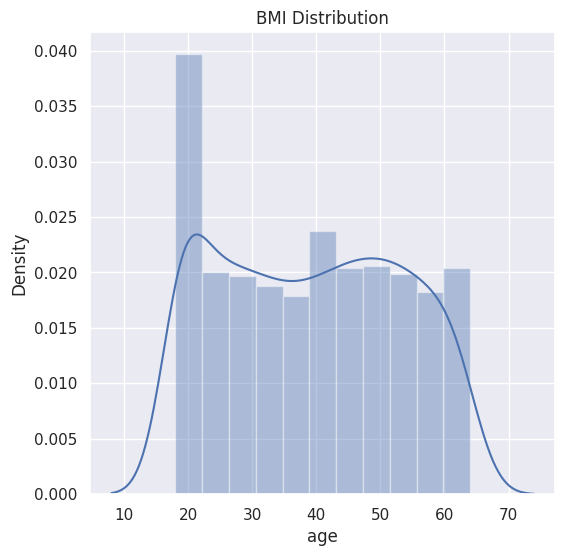

In [ ]:
#distribution of age value using seaborn library
sns.set()

plt.figure(figsize = (6,6))

sns.distplot(I['age'])

plt.title("BMI Distribution")

plt.show()

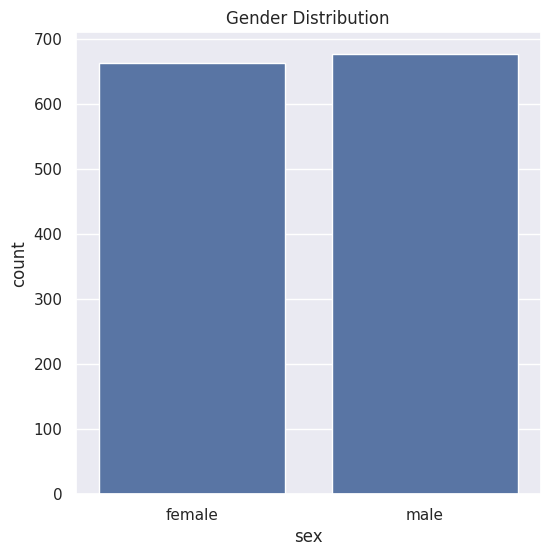

In [ ]:
#Gender column
plt.figure(figsize = (6,6))
sns.countplot(x='sex',data=I)
plt.title("Gender Distribution")
plt.show()

<ipython-input-21-08dd174d5ef2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(I['bmi'])


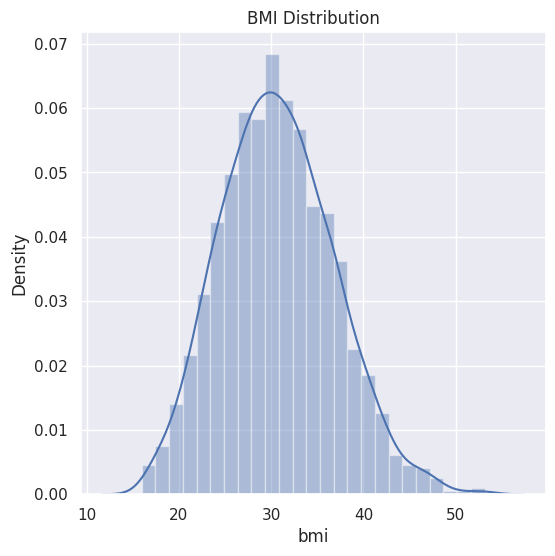

In [ ]:
#BMI Distribution
sns.set()

plt.figure(figsize = (6,6))

sns.distplot(I['bmi'])

plt.title("BMI Distribution")

plt.show()

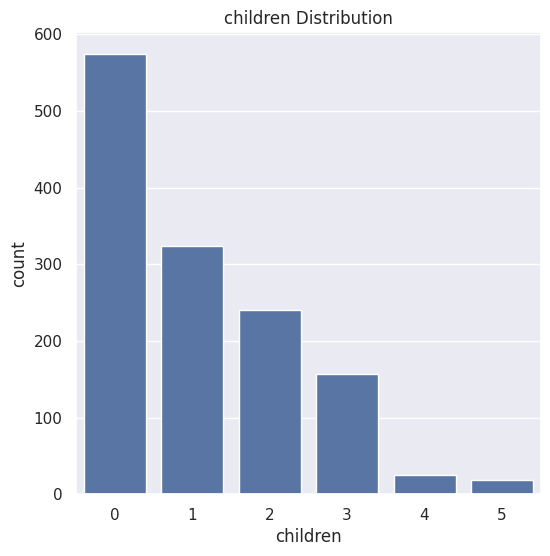

In [ ]:
#Children distribution  #Use countplot
plt.figure(figsize = (6,6))
sns.countplot(x='children',data=I)
plt.title("children Distribution")
plt.show()

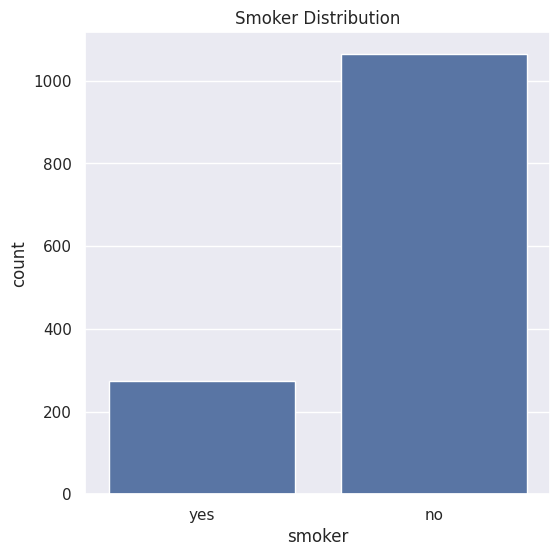

In [ ]:
#Distribution for smoker column  #Use countplot
plt.figure(figsize = (6,6))
sns.countplot(x='smoker',data=I)
plt.title("Smoker Distribution")
plt.show()

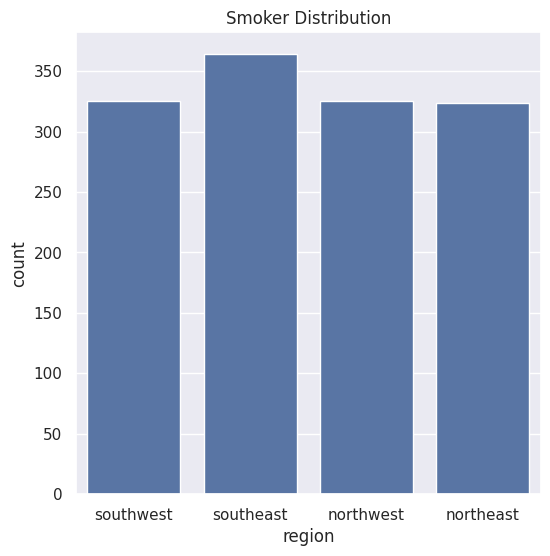

In [ ]:
#Distribution for region column  #Use countplot
plt.figure(figsize = (6,6))
sns.countplot(x='region',data=I)
plt.title("Smoker Distribution")
plt.show()

<ipython-input-26-c919d5aa7ba0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(I['charges'])


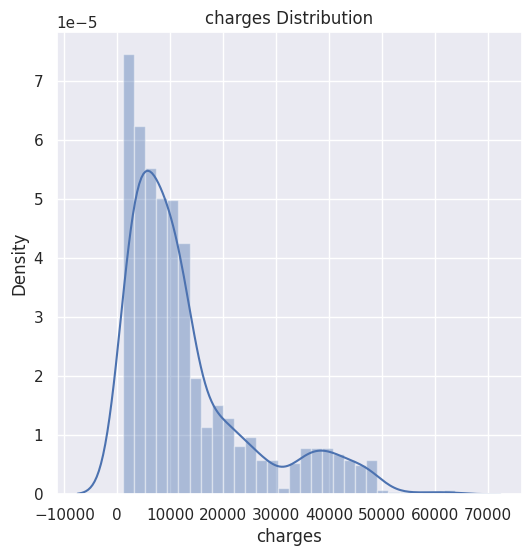

In [ ]:
#Distribution for charges  #Distribution plot
sns.set()

plt.figure(figsize = (6,6))
sns.distplot(I['charges'])
plt.title("charges Distribution")
plt.show()

In [ ]:
#Data processing
#For sex column
pd.unique(I['sex'])
I.replace({'sex':{ 'male' : 0,'female' : 1}},inplace=True)

#for smokers column
I.replace({'smoker': {'yes' :0 , 'no' : 1}},inplace=True)

#for region column
I.replace({'region': {'southeast' :0 , 'southwest' : 1 ,'northwest' :2,'northeast':3}},inplace=True)

In [ ]:
#Splitting input features

X = I.drop(columns='charges', axis = 1)
Y = I['charges']

In [ ]:
#splitting the data
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [ ]:
#splitting the shape
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
# Model Training
model = LinearRegression()

In [ ]:
# Training the ML model with training data
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#trainnig the prediction data
training_data_prediction = model.predict(X_train)

In [ ]:

#Accuracy score for training data
training_data_accuracy = metrics.r2_score(Y_train, training_data_prediction)
print("Accuracy score for training data", training_data_accuracy)

Accuracy score for training data 0.7518195459072954


In [ ]:

#Accuracy score for testing data
testing_data_prediction = model.predict(X_test)
testing_data_accuracy = metrics.r2_score(Y_test, testing_data_prediction)
print("Accuracy score for testing data", testing_data_accuracy)

Accuracy score for testing data 0.7454471618659976


In [ ]:
I

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [ ]:
#Building the predictive system
input_data = (32,0,28.88,0,1,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
#Predicting the cost
prediction = model.predict(input_data_reshaped)
print("Medical insurance price according to the prediction is",prediction)

Medical insurance price according to the prediction is [5476.8728605]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
